In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # splitting training and testing dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # we need to convert the text data into numerical value so that ML model can understand it
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # to evaluate the model , how good the predictions are made
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # Word clouds can help visualize the most frequent terms in your emails.

In [3]:
raw_mail_data = pd.read_csv('./mail_data.csv')

In [4]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
# replace the null values in data to null strings
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
mail_data.head() # prints the first 5 rows of the dataframe

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


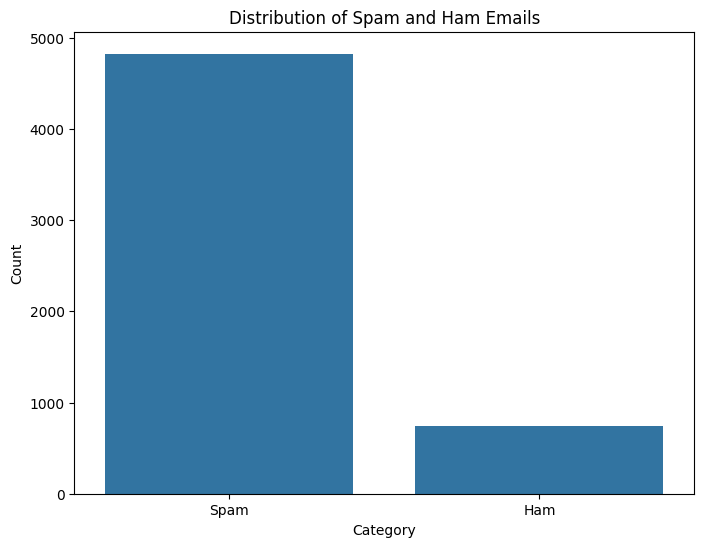

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=raw_mail_data)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'])
plt.show()

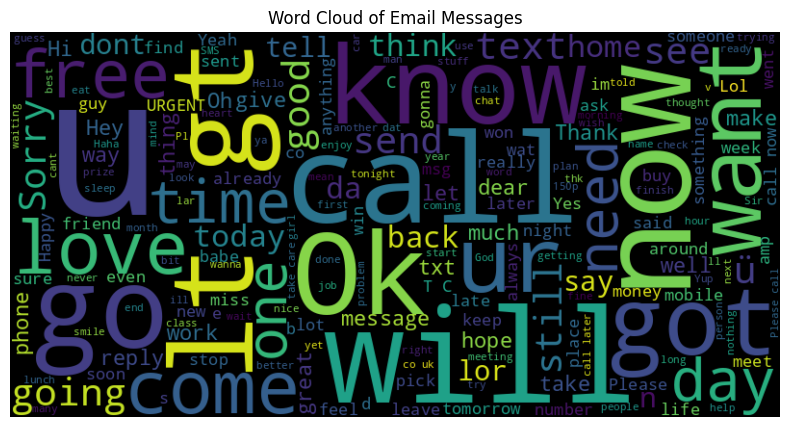

In [8]:
text = ' '.join(raw_mail_data['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Messages')
plt.show()

In [9]:
# checking the number of rows and columns in our dataframe
mail_data.shape

(5572, 2)

In [10]:
# label enconding , spam mail as 0 ; ham mail as 1
mail_data.loc[mail_data['Category']=='spam','Category',] = 0
mail_data.loc[mail_data['Category']=='ham','Category',] = 1

In [12]:
from os import X_OK
# seperating the data as text(mail)->x-axis and labels(Category)->y-axis
X = mail_data['Message']
Y = mail_data['Category']
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [13]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3) # 0.2 means 20% of testing data ;

In [14]:
# Feature extraction
# transform the text data to feature vectors that can be used as input to the logistic regression model
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english' , lowercase=True)
# TfidVectorizer try to go to every words in the document and if any word is repeated several no. of times then it will get some score ,, in spam mails free, offer, discount such words are repeated many times

X_train_features = feature_extraction.fit_transform(X_train) # fit your data into vectorizer function
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
# Training the Model

In [15]:
model = LogisticRegression()

In [16]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [17]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [18]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [19]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail
